In [3]:
import qtm.qcompilation
import numpy as np
import types
%load_ext autoreload
%autoreload 2

In [ ]:
num_qubits = 3
num_layers = 1

thetas = np.ones((2*num_qubits)*num_layers)
compiler = qtm.qcompilation.QuantumCompilation(
    u = qtm.ansatz.create_polygongraph_ansatz,
    vdagger = qtm.state.create_AME_state_fake(num_qubits).inverse(),
    optimizer = 'adam',
    loss_func = 'loss_fubini_study',
    thetas = thetas,
    num_layers = num_layers
)
compiler.fit(num_steps = 100, verbose = 1)

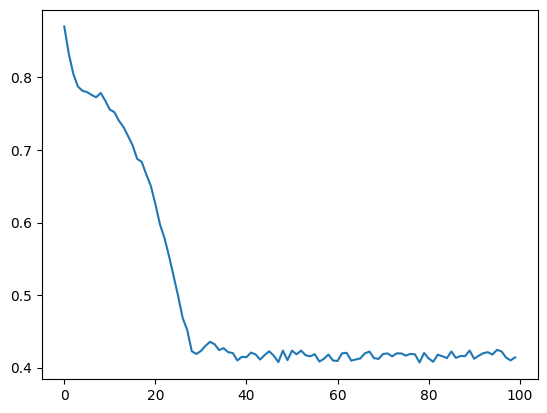

In [20]:
import matplotlib.pyplot as plt
plt.plot(compiler.loss_values)

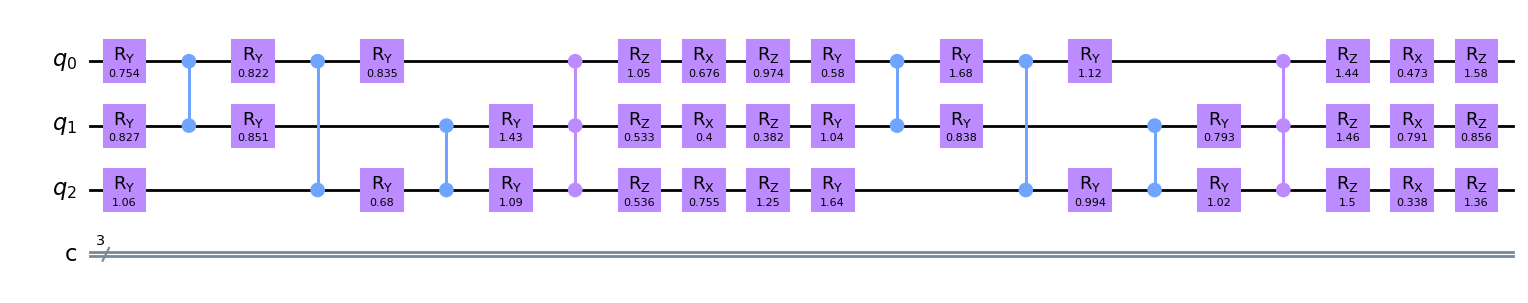

In [7]:
qtm.ansatz.create_hypergraph_layered_ansatz(qiskit.QuantumCircuit(3,3), thetas, 2).draw('mpl')

In [8]:
import qtm.qcompilation
import numpy as np
import types, qiskit
num_qubits = 3
num_layers = 1

for optimizer in ['adam']:
    thetas = np.ones((6*num_qubits)*num_layers)
    compiler = qtm.qcompilation.QuantumCompilation(
        u = qtm.ansatz.create_hypergraph_layered_ansatz,
        vdagger = qtm.state.create_AME_state(num_qubits).inverse(),
        optimizer = optimizer,
        loss_func = 'loss_fubini_study',
        thetas = thetas,
        is_evolutional=False,
        num_layers = num_layers
    )
    compiler.fit(num_steps = 100, verbose = 1)
    #compiler.save("", text = "", path = f"../experiments/polygon_graph_ghz_{num_layers}_layer_{optimizer}_scheduler/3/", save_all = True)
    

Step:   0%|          | 0/100 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
Step: 100%|██████████| 100/100 [02:15<00:00,  1.36s/it]


In [11]:
compiler.save("", text = "", path = f"../experiments/hyper_graph_layered_ame_{num_layers}_layer_{optimizer}/3/", save_all = True)
   

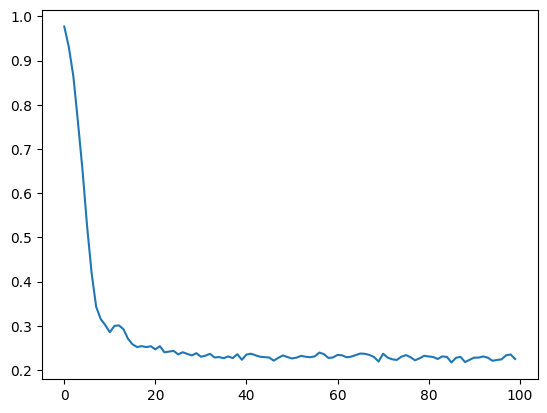

In [10]:
import matplotlib.pyplot as plt
plt.plot(compiler.loss_values)

In [6]:
np.min(compiler.loss_values)

0.0

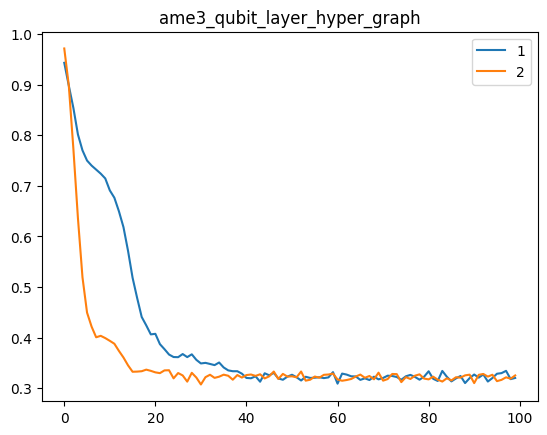

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

ansatz = "hyper_graph"
for layer in [1,2]:
    for optimizer in ['adam']:
        loss = pd.read_csv(f"../experiments/{ansatz}_ame_{layer}_layer_{optimizer}/3/loss_values.csv", sep=",", header=None)
        #loss = loss.applymap(lambda s: complex(s.replace('i', 'j'))).values
        plt.plot(loss, label = layer)
plt.title(f"ame3_qubit_layer_{ansatz}")
plt.legend()
#plt.savefig(f"ghz3_qubit_1_layer_{ansatz}_loss.eps", format = "eps", dpi = 1000)

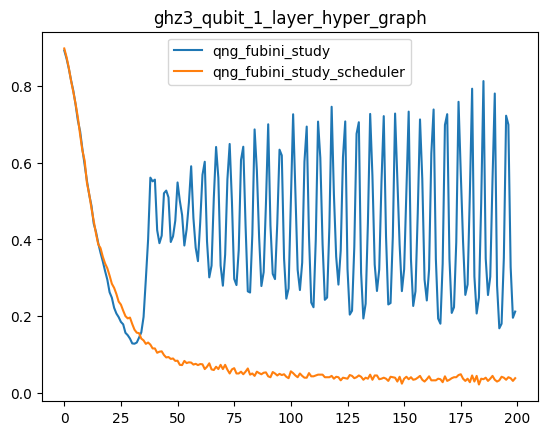

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

ansatz = "hyper_graph"
for optimizer in ['qng_fubini_study', 'qng_fubini_study_scheduler']:
    loss = pd.read_csv(f"../experiments/{ansatz}_ghz_1_layer_{optimizer}/3/loss_values.csv", sep=",", header=None)
    #loss = loss.applymap(lambda s: complex(s.replace('i', 'j'))).values
    plt.plot(loss, label = optimizer)
plt.title(f"ghz3_qubit_1_layer_{ansatz}")
plt.legend()
#plt.savefig(f"ghz3_qubit_1_layer_{ansatz}_loss.eps", format = "eps", dpi = 1000)